In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load cleaned dataset
df = pd.read_csv("../data/clean/soil_data_final.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (620, 5)


,N,P,K,pH,EC
0,131,61,181,7.1,0.11
1,171,21,250,4.9,2.09
2,161,57,186,5.8,0.93
3,160,52,66,6.2,0.17
4,137,74,188,6.1,0.57


In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Features for PCA
features = ['N', 'P', 'K', 'pH', 'EC']
X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data standardized successfully.")
print("Mean (approx):", np.round(X_scaled.mean(), 2))
print("Std deviation (approx):", np.round(X_scaled.std(), 2))


✅ Data standardized successfully.
Mean (approx): -0.0
Std deviation (approx): 1.0


In [4]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Display variance explained by each component
for i, var in enumerate(explained_var, start=1):
    print(f"PC{i}: {var:.3f} ({cumulative_var[i-1]*100:.1f}% cumulative)")


PC1: 0.348 (34.8% cumulative)
PC2: 0.330 (67.8% cumulative)
PC3: 0.144 (82.3% cumulative)
PC4: 0.122 (94.4% cumulative)
PC5: 0.056 (100.0% cumulative)


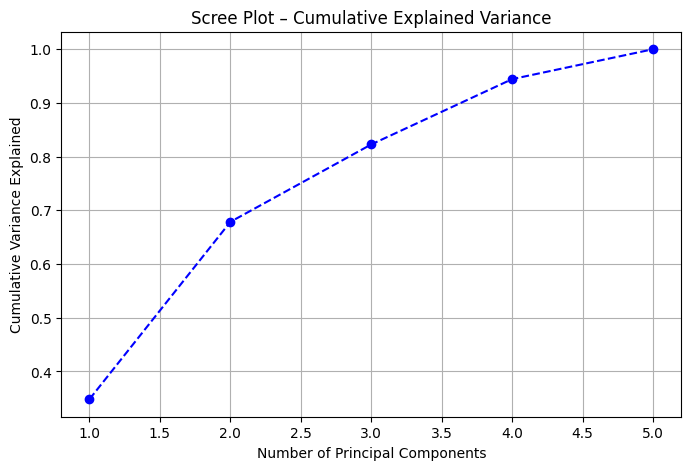

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o', linestyle='--', color='b')
plt.title('Scree Plot – Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()


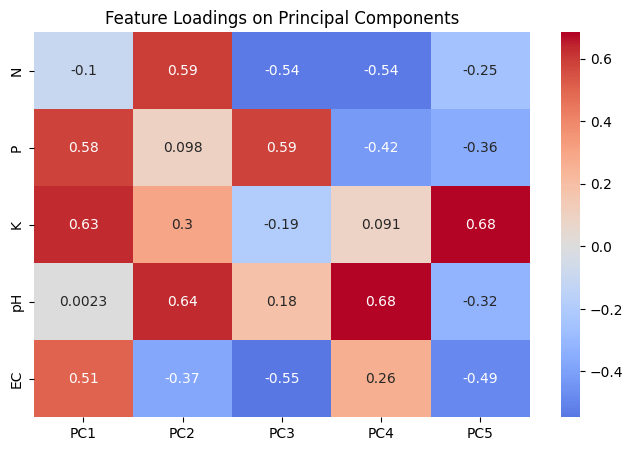

,PC1,PC2,PC3,PC4,PC5
N,-0.100792,0.594442,-0.535302,-0.535976,-0.250324
P,0.582877,0.097652,0.587783,-0.421588,-0.357063
K,0.627469,0.303914,-0.191684,0.090679,0.684802
pH,0.002251,0.636561,0.180565,0.676367,-0.323587
EC,0.506333,-0.373537,-0.546458,0.263247,-0.485985


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loadings = PCA components (feature contribution to each PC)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(explained_var))],
    index=df.columns
)

plt.figure(figsize=(8, 5))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Loadings on Principal Components')
plt.show()

loadings


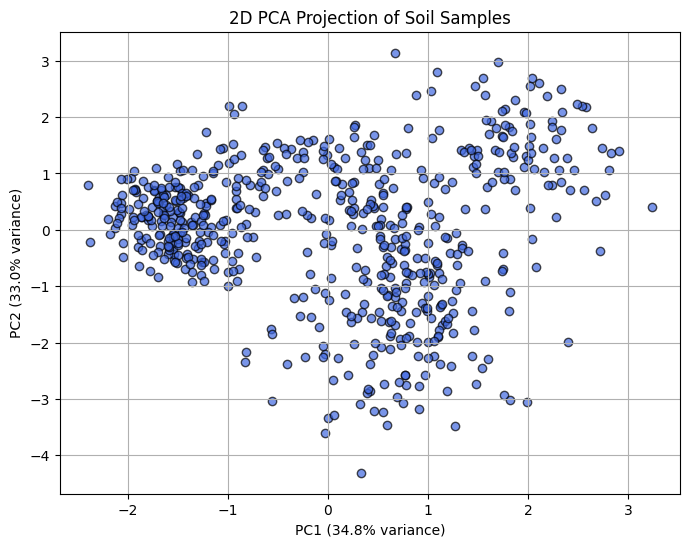

In [7]:
import matplotlib.pyplot as plt

# Project data into PCA space
pca_data = pca.transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='royalblue', alpha=0.7, edgecolor='k')

plt.title('2D PCA Projection of Soil Samples')
plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}% variance)')
plt.grid(True)
plt.show()
